# This notebook steps through all visualizations of the Discovery dataset

In [9]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn 
import sys
import os 

In [18]:
sys.path.append("/home/lucy/")
import calculation_function as calc

In [22]:
sc.set_figure_params(figsize=[6,6], format='pdf')

## Load data

In [12]:
#path storing the dataset
data_path = "/home/lucy/disc_vali_full_dataset/"

disc = sc.read( os.path.join(data_path, "VUMC_HTAN_DIS_EPI_V2.h5ad") )

In [13]:
disc

AnnData object with n_obs × n_vars = 65088 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification'
    obsm: 'X_pca', 'X_umap'

In [14]:
disc.raw = disc #save the raw count 

In [15]:
header = sc.read("./disc_header.h5ad")
header

AnnData object with n_obs × n_vars = 65088 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'all_targets', 'miR-10-5p', 'miR-135ab-5p', 'miR-218-5p', 'miR-190-5p', 'miR-193-3p', 'miR-33-5p', 'miR-182-5p', 'miR-362-5p', 'miR-23-3p', 'miR-18-5p', 'miR-18-3p/7069-3p', 'miR-194-2-3p/6926-5p/7055-5p', 'miR-130-3p/301-3p', 'miR-103-3p/107-3p', 'miR-205-5p', 'miR-183-3p', 'miR-7-5p', 'miR-423-3p', 'miR-501-5p', 'miR-185-5p', 'miR-423-5p', 'miR-26-5p', 'miR-147-3p', 'miR-484', 'miR-378-3p', 'miR-22-3p', 'miR-652-3p', 'miR-374b-5p', 'miR-210-3p', 'miR-194-5p', 'miR-192-5p/215-5p', 'miR-196-5p', 'miR-324-3p', 'miR-27-3p', 'miR-141-3p', 'miR-1198-5p', 'miR-19-3p', 'miR-183-5p', 'let-7-5p/miR-98-5p', 'miR-200-3p/429-3p', 'miR-3081-3p', 'miR-125ab-5p/351-5p', 'miR-28-3p', 'miR-181-5p', 'miR-151-3p', 'miR-24-3p', 'miR-96-5p', 'miR-186-5p', 'miR-425-5p/489-3p', 'miR-17-5p/20-5p/93-5p/106-5p', 'miR-21ac-5p'

In [17]:
header.X = disc.X
header.raw = header

In [19]:
calc.normalization(header)

AnnData object with n_obs × n_vars = 65088 × 35272
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Polyp_Type', 'Sample_Classification', 'Patient', 'KRAS_mutation', 'all_targets', 'miR-10-5p', 'miR-135ab-5p', 'miR-218-5p', 'miR-190-5p', 'miR-193-3p', 'miR-33-5p', 'miR-182-5p', 'miR-362-5p', 'miR-23-3p', 'miR-18-5p', 'miR-18-3p/7069-3p', 'miR-194-2-3p/6926-5p/7055-5p', 'miR-130-3p/301-3p', 'miR-103-3p/107-3p', 'miR-205-5p', 'miR-183-3p', 'miR-7-5p', 'miR-423-3p', 'miR-501-5p', 'miR-185-5p', 'miR-423-5p', 'miR-26-5p', 'miR-147-3p', 'miR-484', 'miR-378-3p', 'miR-22-3p', 'miR-652-3p', 'miR-374b-5p', 'miR-210-3p', 'miR-194-5p', 'miR-192-5p/215-5p', 'miR-196-5p', 'miR-324-3p', 'miR-27-3p', 'miR-141-3p', 'miR-1198-5p', 'miR-19-3p', 'miR-183-5p', 'let-7-5p/miR-98-5p', 'miR-200-3p/429-3p', 'miR-3081-3p', 'miR-125ab-5p/351-5p', 'miR-28-3p', 'miR-181-5p', 'miR-151-3p', 'miR-24-3p', 'miR-96-5p', 'miR-186-5p', 'miR-425-5p/489-3p', 'miR-17-5p/20-5p/93-5p/106-5p', 'miR-21ac-5p'

In [20]:
header.X.sum(axis = 1) #checking normalization 
#normalized if containing negative value 

array([-975.4978 , -844.81464, -276.75848, ..., -266.5004 , 1126.9031 ,
        411.42285], dtype=float32)

In [24]:
top10_miR_fam_dat = pd.read_csv("./TOP_10_miR_family_in_CRC.csv")
top10_miR_fam_dat.head()

miR.family      baseMean  peak.number
0                    let-7-5p/miR-98-5p  16465.710160          779
1  miR-15-5p/16-5p/195-5p/322-5p/497-5p   5286.547861          473
2                             miR-29-3p   1411.369229          463
3                     miR-200-3p/429-3p  35895.615870          431
4          miR-17-5p/20-5p/93-5p/106-5p  18199.014110          425

## Visualize Metadata

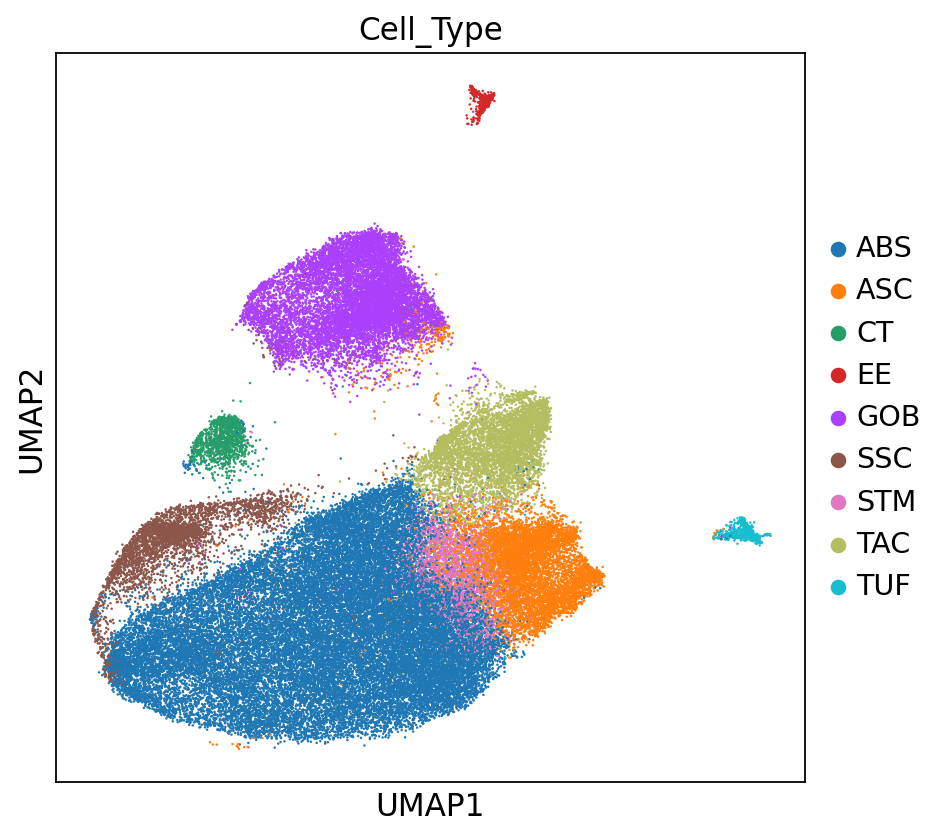

In [23]:
sc.pl.umap(header, color = ["Cell_Type"], s = 5,)
#to save, add in arg:  save =  "_disc_cell_type"

## Visualize CSNK genes' expression profile 

In [ ]:
csnks = pd.Series( ['CSNK1A1',  'CSNK1D', 'CSNK1E', 'CSNK1G2',
        'CSNK1G3', 'CSNK2A1','CSNK2A2' ,'CSNK2B'] )

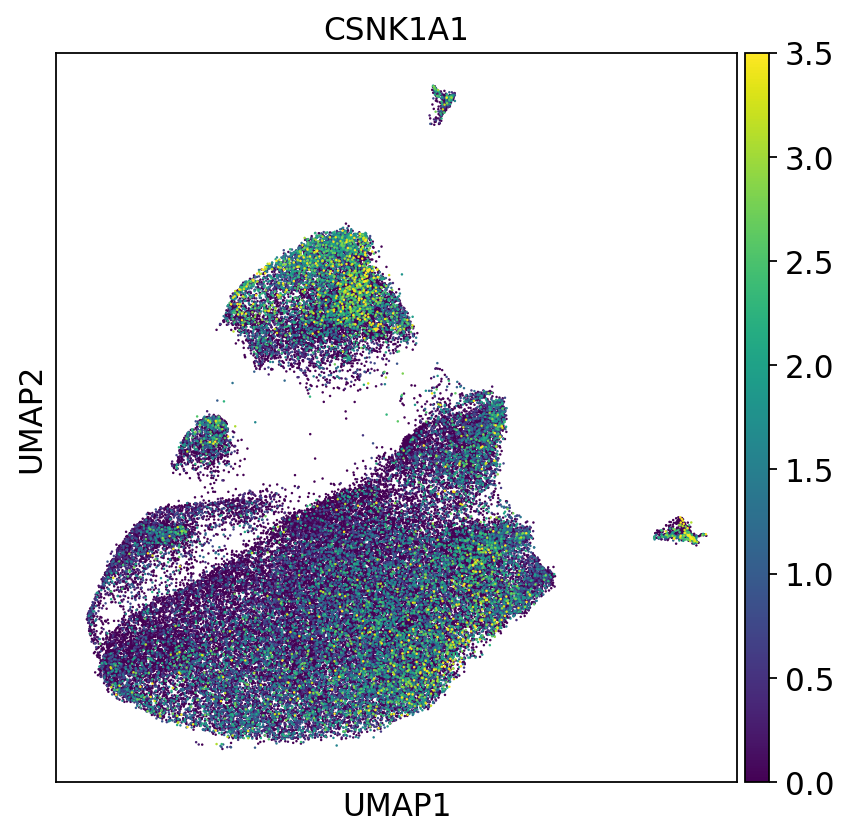

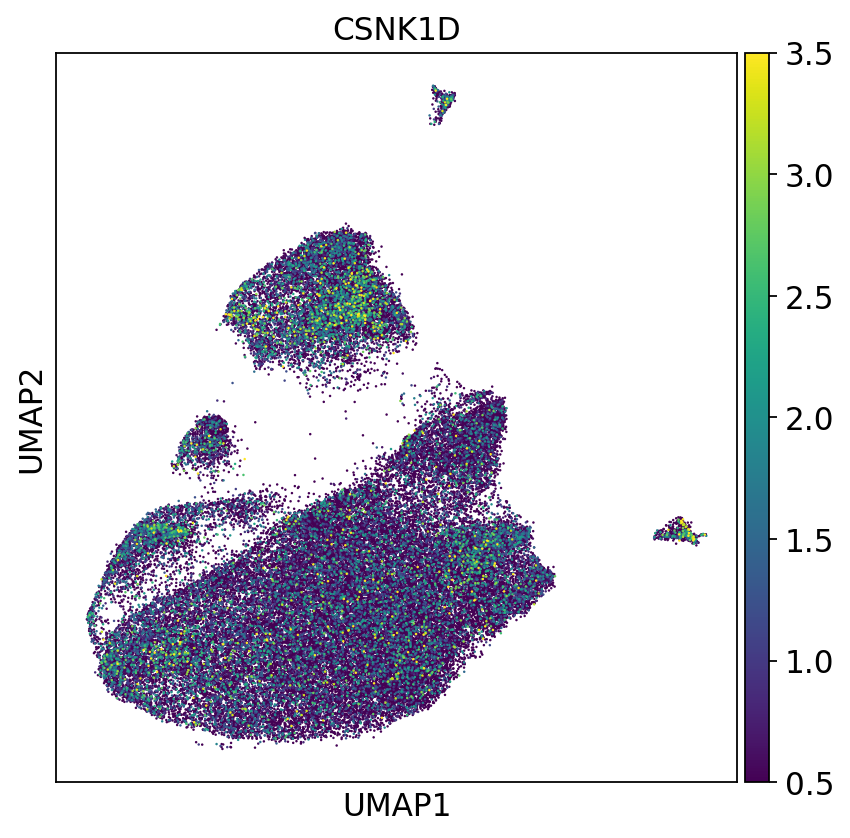

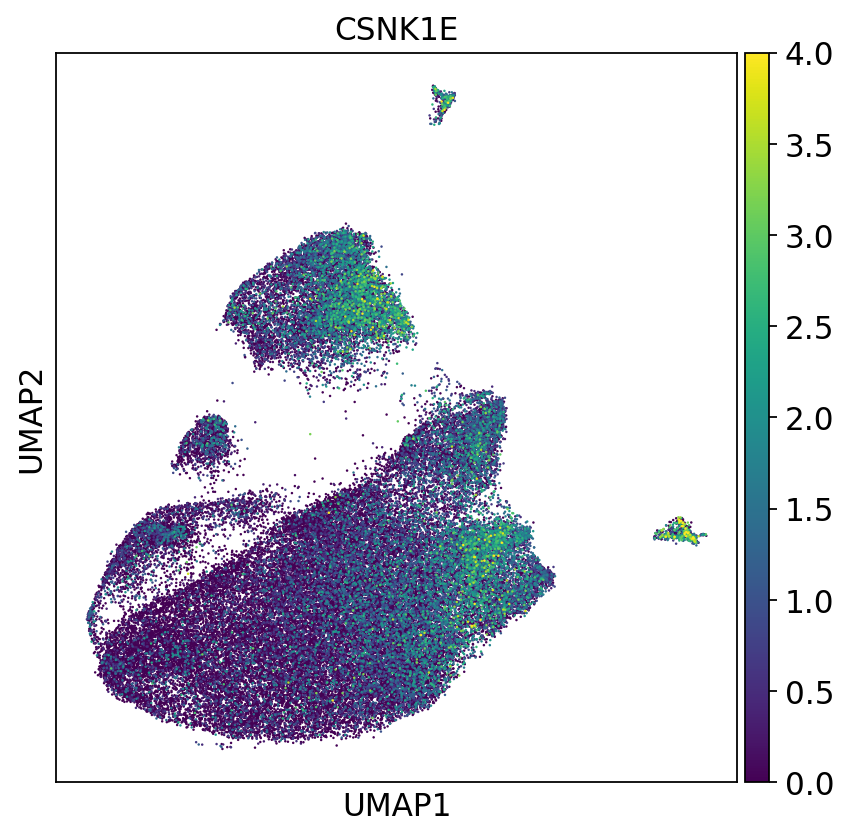

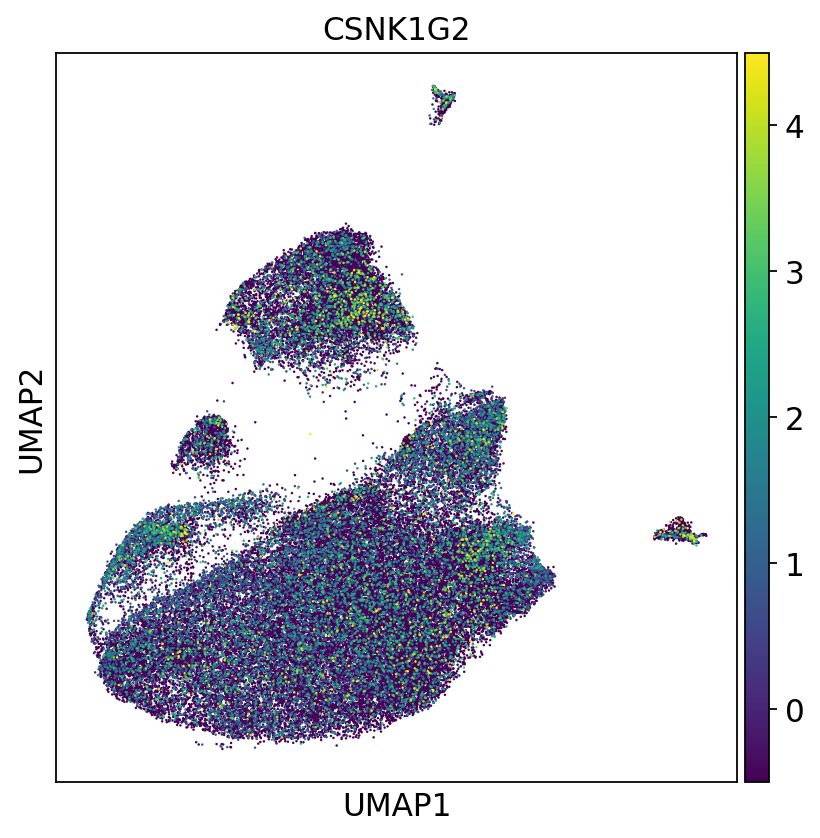

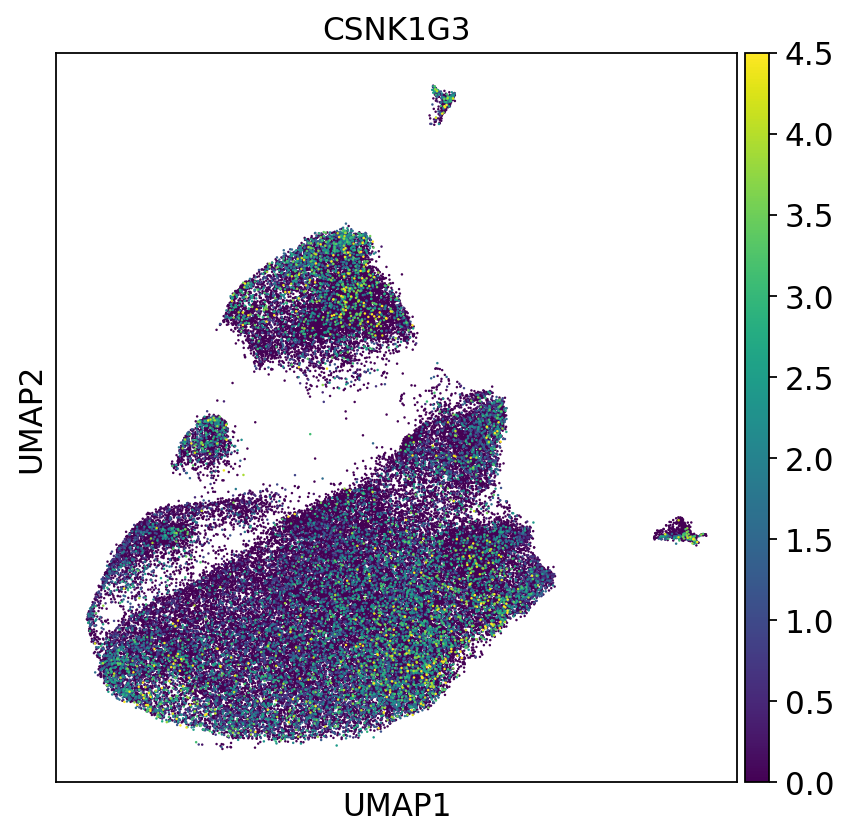

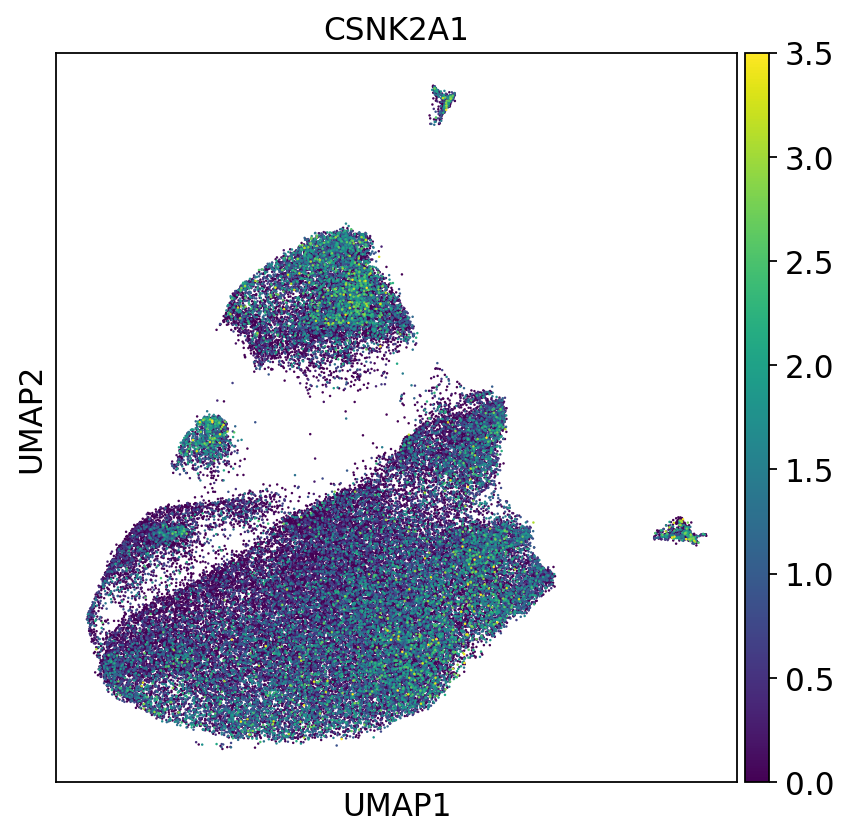

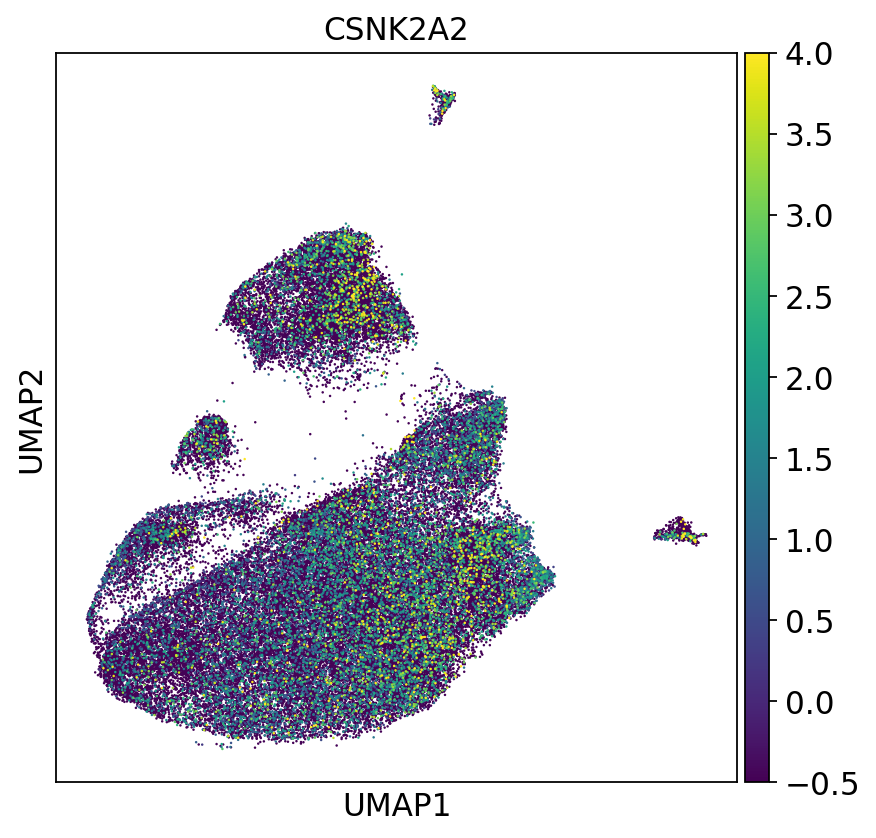

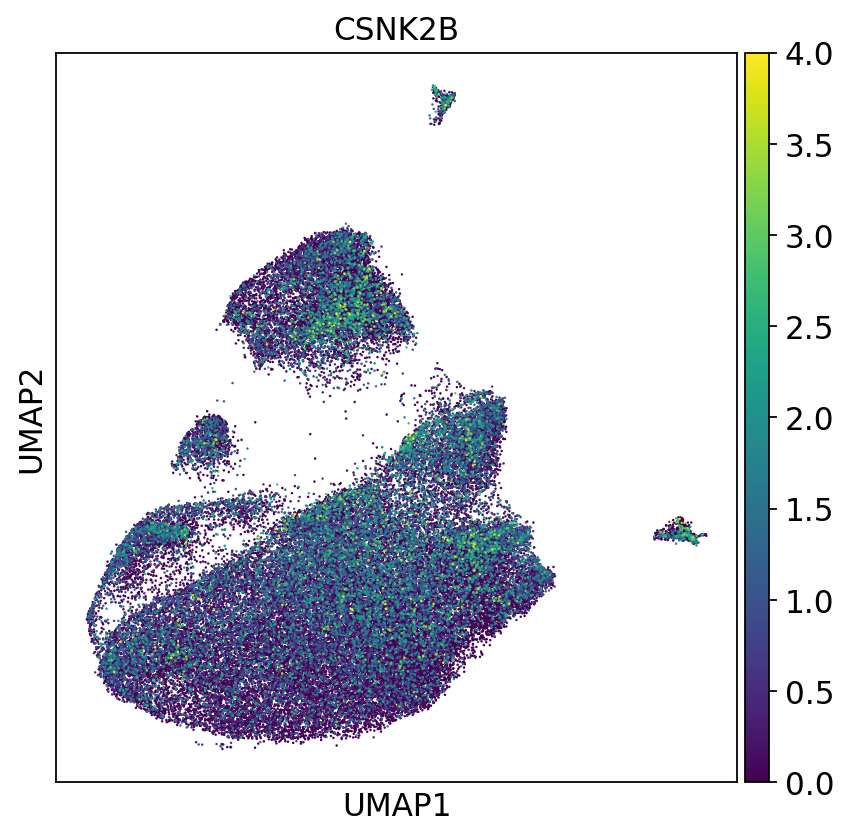

In [25]:
# to adjust scales 
#      1.     2.  3.    4.  5     6.  7.  8
vmx = [3.5,   3.5,  4,  4.5,  4.5,  3.5,  4,  4]
vmn = [0 ,  0.5,  0,    -0.5,  0,  0,  -0.5,  0]

sc.set_figure_params(figsize = [6,6], format = 'pdf')
for i in range(len(csnks)):

    sc.pl.umap(header, color = csnks[i] , use_raw= False ,
               vmax = vmx[i], vmin = vmn[i], s = 5, 
               save = "_disc_" + csnks[i])
###

## Visualize miRNA target gene scores 
- from selected families
- all target genes

In [ ]:
# for selected families 
sc.set_figure_params(figsize=[5,5], format = 'pdf')
sc.pl.umap(header, color = top10_fam_names, use_raw = False, vmin = 0, vmax = 0.35, ncols=3,
          save = "_disc_selected_miR_family")

In [ ]:
#for all targets
sc.pl.umap(header, color = ["all_targets"], use_raw=False , vmin = -0.05, vmax = 0.35, save = "_all_target")